#### 1. 开源制图库cartopy绘图基础
Cartopy是一个Python包，用于地理空间数据处理，以便生成地图和其他地理空间数据分析。Cartopy最初为英国气象局开发的，目的是让科学家能够快速、方便以及准确地在地图上可视化他们的数据。Cartopy在开源协议GNU GPL下对用户开放。
Cartopy是在matplotlib库基础上开发的，其与matplotlib的区别在于添加了与地理信息相关的功能，如添加投影、添加海岸线等。



In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat ## 添加地理要素底图

1.1 cartopy投影：   
等距圆柱投影(platecarre, cartopy默认投影), 阿尔伯斯等面积投影(AlbersEqualArea), 等角圆柱投影(Mercator)
参考：https://scitools.org.uk/cartopy/docs/latest/reference/projections.html    
note: 与matplotlib搭配使用时，需通过fig.add_subplot()设置投影信息。

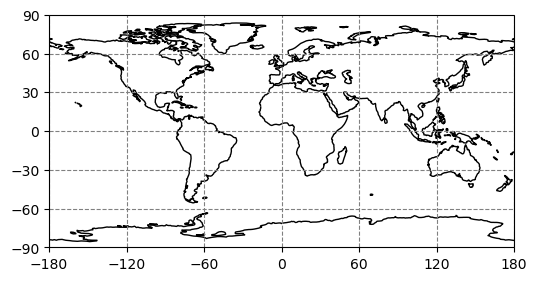

In [6]:
### 1.1 cartopy投影：
#### 添加地理要素、添加经纬度及格网
proj = ccrs.PlateCarree()
x_ticks = [-180,-120, -60, 0, 60, 120, 180]  ## 经度范围
y_ticks = [-90, -60, -30, 0, 30, 60,90]    ## 纬度范围
fig = plt.figure(figsize=(6,6))
ax_geo = fig.add_subplot(1,1,1, projection=proj)  ## 通过.add_subplot()该方式添加投影
ax_geo.add_feature(cfeat.COASTLINE)  ## 添加海岸线
ax_geo.set_xticks(x_ticks)    ## 添加经纬度
ax_geo.set_yticks(y_ticks)
ax_geo.gridlines(linestyle='--', color='grey')


Text(0.5, 1.0, 'angle-equal projection')

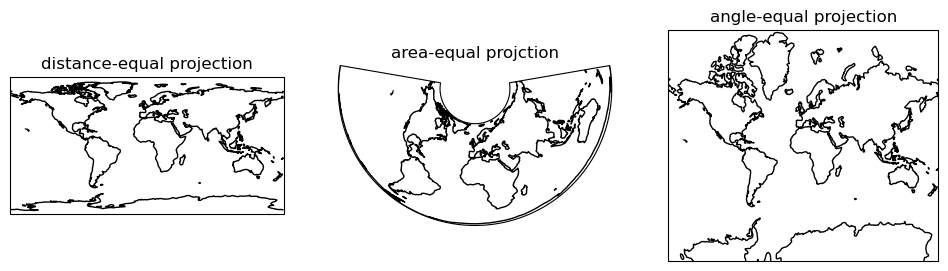

In [7]:
proj_1 = ccrs.PlateCarree()     ### 等距圆柱投影，经纬度格网
proj_2 = ccrs.AlbersEqualArea() ### 阿尔伯斯等面积投影
proj_3 = ccrs.Mercator()        ### 等角圆柱投影
fig = plt.figure(figsize=(12,3))
ax_geo_1 = fig.add_subplot(1,3,1, projection=proj_1)
ax_geo_1.add_feature(cfeat.COASTLINE)
ax_geo_1.set_title('distance-equal projection')
ax_geo_2 = fig.add_subplot(1,3,2, projection=proj_2)
ax_geo_2.add_feature(cfeat.COASTLINE)
ax_geo_2.set_title('area-equal projction')
ax_geo_3 = fig.add_subplot(1,3,3, projection=proj_3)
ax_geo_3.add_feature(cfeat.COASTLINE)
ax_geo_3.set_title('angle-equal projection')


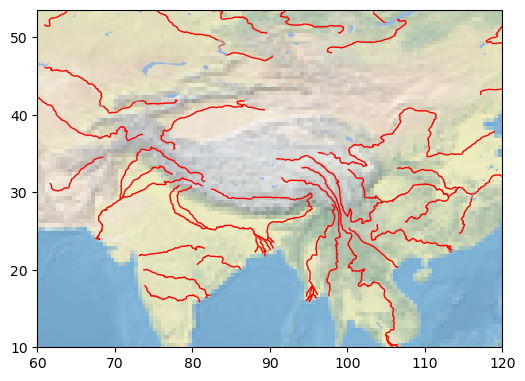

In [ ]:
## 1.2 添加地理要素
fig = plt.figure(figsize=(6,6))
ax_geo_1 = fig.add_subplot(1,1,1, projection=proj_1)
ax_geo_1.add_feature(cfeat.LAND)
ax_geo_1.add_feature(cfeat.OCEAN)
ax_geo_1.add_feature(cfeat.RIVERS, edgecolor='red')
ax_geo_1.add_feature(cfeat.LAKES)
ax_geo_1.stock_img()   ### 添加地形底图
ax_geo_1.set_extent([60.0, 120.0, 10, 50.0])
x_ticks = [60.0, 70, 80, 90, 100, 110, 120.0]## 经度范围
y_ticks = [10, 20, 30, 40, 50]    ## 纬度范围
ax_geo_1.set_xticks(x_ticks)    ## 添加经纬度
ax_geo_1.set_yticks(y_ticks);


In [ ]:
#### 2. 利用开源制图库cartopy进行gis数据可视化
import numpy as np
from osgeo import gdal
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
import geopandas as gpd

In [ ]:
### 2.1 矢量数据显示
path_kunming = 'data/Section-6/kunming_wgs84.gpkg'


EPSG:4326


<Axes: >

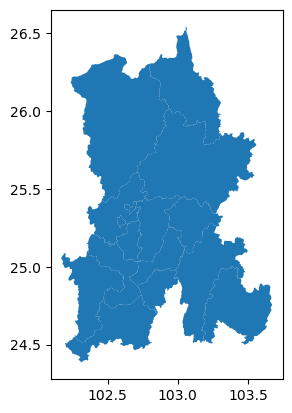

In [ ]:
### 常规可视化方式
kunming_gpd = gpd.read_file(path_kunming)
print(kunming_gpd.crs)
kunming_gpd.plot()  ## 设置显示范围？设置底图？


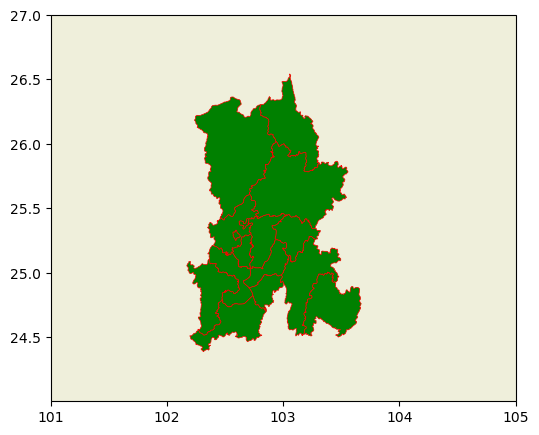

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6,6))
## 注意定义投影，没定义投影为普通ax对象，不具备cartopy功能。
ax_geo = fig.add_subplot(111, projection=proj)  
x_ticks = [101, 102, 103, 104, 105]
y_ticks = [24.5, 25, 25.5, 26, 26.5, 27]
ax_geo.set_extent([101, 105, 24, 27])
# ax_geo.set_extent([80, 125, 10, 47])  ## 展示底图
ax_geo.add_feature(cfeat.LAND)
kunming_gpd.plot(ax=ax_geo, facecolor='green', edgecolor = 'red', linewidth=0.5)
ax_geo.set_xticks(x_ticks);
ax_geo.set_yticks(y_ticks);


In [ ]:
## 2.2 栅格数据显示
import rasterio as rio


In [26]:
path_rsimg = 'data/Section-6/s2_kunming_chenggong_4bands_10m_wgs84.tif'
rsimg_rio = rio.open(path_rsimg)
rsimg_rio.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 3189,
 'height': 3124,
 'count': 4,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(9.450635211105793e-05, 0.0, 102.70324341425528,
        0.0, -9.450635211105793e-05, 24.99108870425977)}

In [ ]:
array_rsimg = rsimg_rio.read()
array_rsimg = array_rsimg.transpose(1,2,0)
array_rsimg_ = np.clip(array_rsimg, 0, 3000)/3000  ## 直方图拉伸，拉伸到0-3000
array_rsimg_ = np.where(array_rsimg_==0, 1, array_rsimg_)
### 获得用于matplotlib显示的影像范围，注意matplotlib显示中范围坐标次序。
extent_rsimg = [rsimg_rio.bounds[0], 
                rsimg_rio.bounds[2], 
                rsimg_rio.bounds[1], 
                rsimg_rio.bounds[3]]
extent_rsimg


[102.70324341425528, 103.00462417113745, 24.695850860264827, 24.99108870425977]

<Axes: >

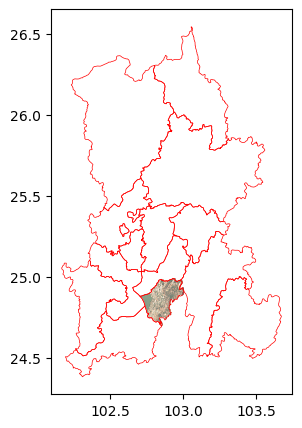

In [28]:
### 常规可视化方式
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(array_rsimg_[:,:,0:3], extent=extent_rsimg)
kunming_gpd.plot(ax=ax, facecolor='none', edgecolor = 'red', linewidth=0.5)


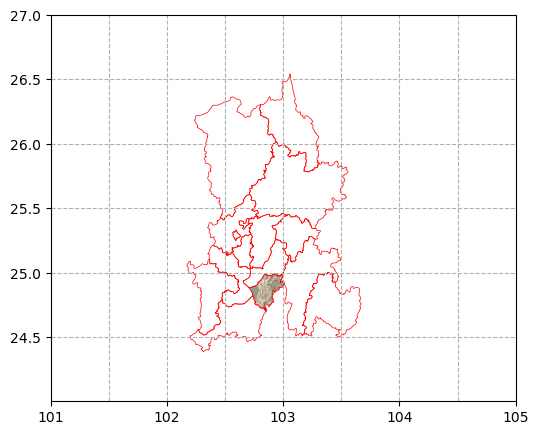

In [32]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6,6))
x_ticks = [101, 102, 103, 104, 105]
y_ticks = [24.5, 25, 25.5, 26, 26.5, 27]
ax_geo = fig.add_subplot(111, projection=proj)
ax_geo.set_extent([101, 105, 24, 27])
# ax_geo.stock_img()  ## 添加地形底图
ax_geo.imshow(array_rsimg_[:,:,0:3], extent=extent_rsimg)
kunming_gpd.plot(ax=ax_geo, facecolor='none', edgecolor = 'red', linewidth=0.5)
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks)
grid = ax_geo.gridlines(draw_labels=False, linestyle='--')  ## 添加格网


多幅影像同一画布显示，非wgs84坐标系数据可视化。   
ax.imshow(rsimg_arr, extent=(left, right, bottom, top), transform=proj_utm45)


In [ ]:
#### 2.3 utm坐标系下栅格数据在地理坐标系下显示。
path_reg1 =  'data/Section-6/s2_kunming_chenggong_6bands_20m_subs.tif'
path_reg2 =  'data/Section-6/s2_kunming_chenggong_6bands_20m_subs2.tif'


In [36]:
rsimg_reg1_rio = rio.open(path_reg1)
rsimg_reg2_rio = rio.open(path_reg2)
rsimg_reg1_rio.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 247,
 'height': 186,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(20.0, 0.0, 277360.0,
        0.0, -20.0, 2748380.0)}

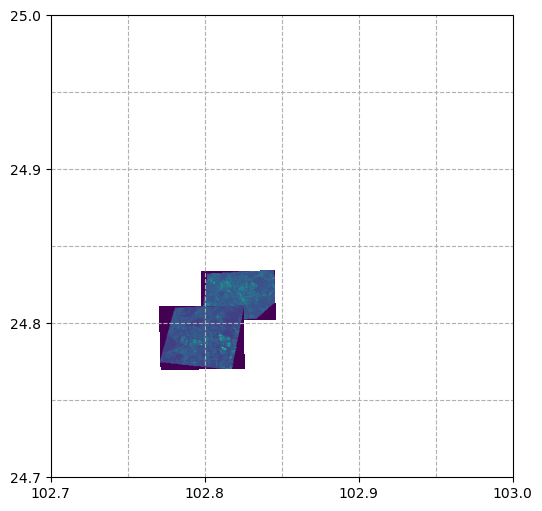

In [54]:
proj_utm=ccrs.UTM(zone=48, southern_hemisphere=False)
fig = plt.figure(figsize=(6,6))
ax_geo = fig.add_subplot(111, projection=proj)
ax_geo.set_extent([102.7, 103., 24.7, 25])
x_ticks = [102.7, 102.8, 102.9, 103]
y_ticks = [24.7, 24.8, 24.9, 25]
extent_reg1 = [rsimg_reg1_rio.bounds[0], rsimg_reg1_rio.bounds[2],
               rsimg_reg1_rio.bounds[1], rsimg_reg1_rio.bounds[3]]
extent_reg2 = [rsimg_reg2_rio.bounds[0], rsimg_reg2_rio.bounds[2],
               rsimg_reg2_rio.bounds[1], rsimg_reg2_rio.bounds[3]]
grid = ax_geo.gridlines(draw_labels=False, linestyle='--')
ax_geo.imshow(rsimg_reg1_rio.read(1), extent=extent_reg1, transform=proj_utm)   
ax_geo.imshow(rsimg_reg2_rio.read(1), extent=extent_reg2, transform=proj_utm)
# kunming_gpd.plot(ax=ax_geo, facecolor='none', edgecolor = 'red', linewidth=0.5)
ax_geo.set_xticks(x_ticks);
ax_geo.set_yticks(y_ticks);
